# **Business Problem**

As a marketing agency, our main goal is to maximise the return on investment (ROI) for our clients’ advertising efforts. To inform future strategy, we've conducted a comparative analysis of two distinct campaigns: one on Facebook and one on AdWords. The objective is to determine which platform delivered better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most efficient platform, we can provide data-backed recommendations for allocating resources and refining our strategies to achieve improved outcomes for our clients.

# **Research Objective** 

The objective of this analysis is to determine which ad platform—Facebook or AdWords—is more effective in terms of conversions, clicks, and overall cost-effectiveness.

**Importing Libraries**

In [2]:
!pip install scikit-learn


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')


# Data Description

The dataset contains information comparing the performance of two advertising campaigns conducted in 2019. Specifically, it includes data from a **Facebook Ad campaign** and an **AdWords Ad campaign**.

**Key features included in the dataset are:**

- **Date:** The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
- **Ad Views:** The number of times the ad was viewed.
- **Ad Clicks:** The number of clicks received on the ad.
- **Ad Conversions:** The number of conversions resulting from the ad.
- **Cost per Ad:** The cost associated with running the Facebook ad campaign.
- **Click-Through Rate (CTR):** The ratio of clicks to views.
- **Conversion Rate:** The ratio of conversions to clicks.
- **Cost per Click (CPC):** The average cost incurred per click on the ad.



In [3]:
# loading the dataset
df = pd.read_csv('marketing_campaign.csv')


In [4]:
# data overview
df.head()


,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [5]:
df.shape

(365, 17)

In [6]:
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


# **Comparing campaigns performance**

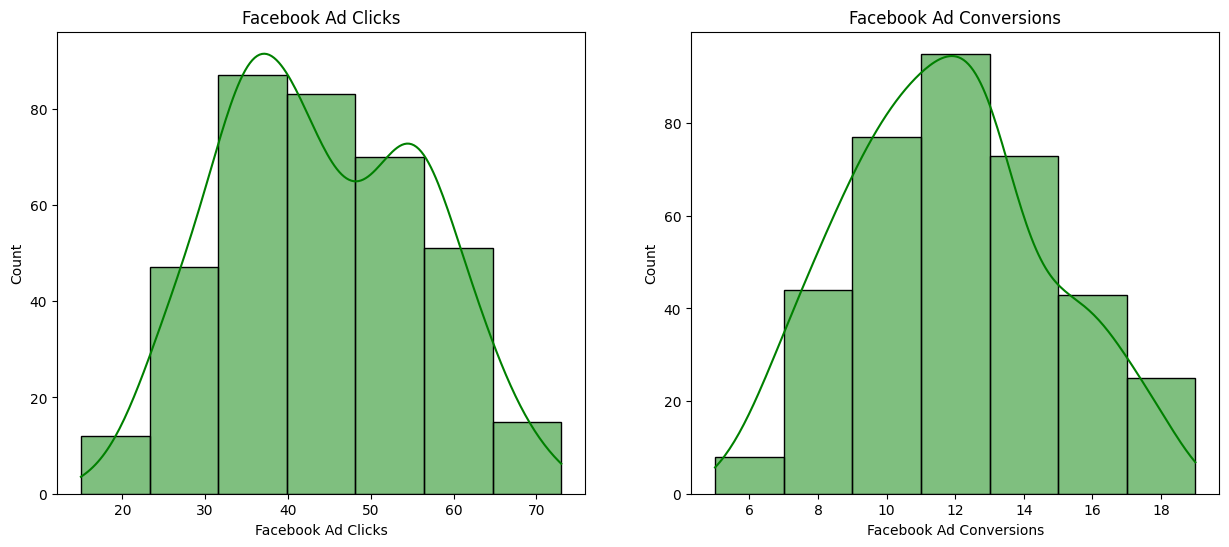

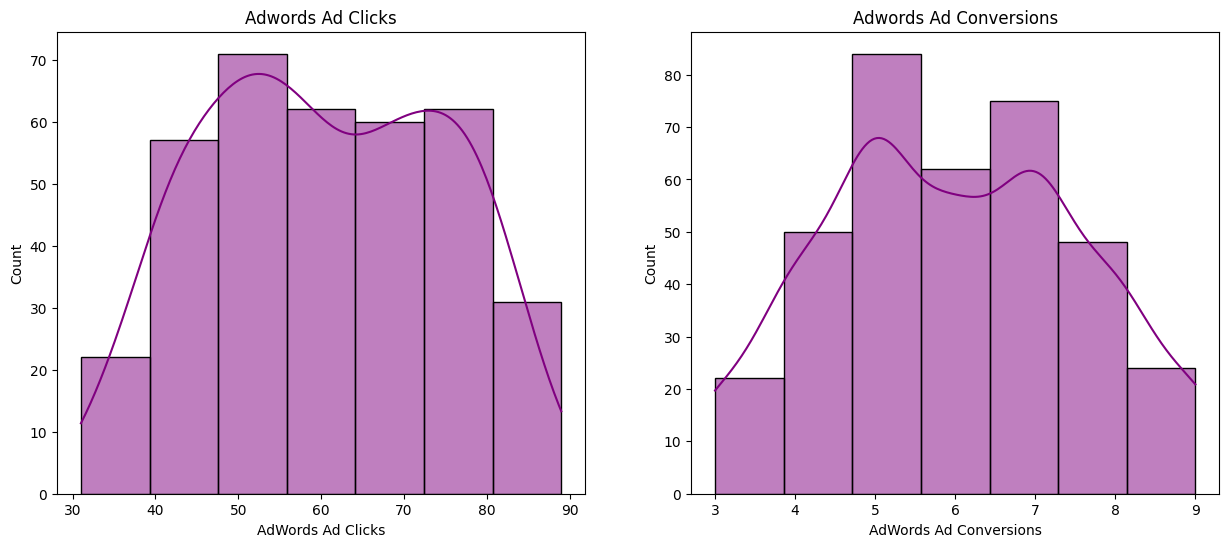

In [9]:
# distribution of the clicks and conversions
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins = 7, edgecolor = "k", color='green', kde = True)

plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins = 7, edgecolor = "k", color='green', kde = True)

plt.show()


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Adwords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins = 7, edgecolor = "k", color='purple', kde = True)

plt.subplot(1,2,2)
plt.title('Adwords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins = 7, edgecolor = "k", color='purple', kde = True)

plt.show()


Each histogram is almost symmetrical in shape. This suggests the number of clicks and conversions is evenly distributed. This implies not many clicks or conversions that are outliers on either the high or low end.

## **How frequently do we observe days with high numbers of conversions compared to days with low number of conversions?**

In [10]:
df['Facebook Ad Conversions']

0       8
1      12
2       8
3       9
4       7
       ..
360    13
361    18
362    13
363     8
364    17
Name: Facebook Ad Conversions, Length: 365, dtype: int64

In [11]:
# creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

# applying function to different campaign's conversions
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['Adwords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')


In [12]:
df[['Facebook Ad Conversions', 'Facebook Conversion Category', 'AdWords Ad Conversions', 'Adwords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,Adwords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [13]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [14]:
pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index()

,Facebook Conversion Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [15]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category': 'Category'})
facebook

,Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [16]:
df['Adwords Conversion Category'].value_counts()

Adwords Conversion Category
6 - 10         209
less than 6    156
Name: count, dtype: int64

In [17]:
adwords = pd.DataFrame(df['Adwords Conversion Category'].value_counts()).reset_index().rename(columns={'Adwords Conversion Category':'Category'})
adwords

,Category,count
0,6 - 10,209
1,less than 6,156


In [18]:
category_df = pd.merge(facebook, adwords, on='Category', how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [19]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,count_x,count_y
3,more than 15,47,0.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,less than 6,1,156.0


In [20]:
X_axis = np.arange(len(category_df))
X_axis

array([0, 1, 2, 3])

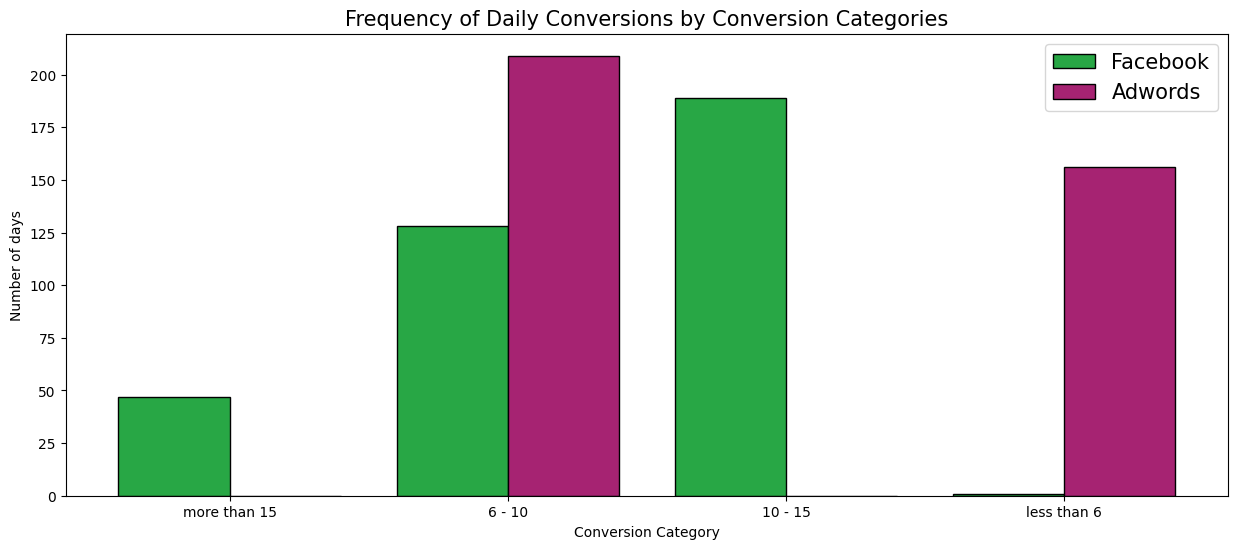

In [21]:
X_axis = np.arange(len(category_df))
plt.figure(figsize = (15,6))

plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook', color = '#28a745', linewidth = 1, edgecolor = 'k')  # Green color
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'Adwords', color = '#A62372', linewidth = 1, edgecolor = 'k')   # Purple color

plt.xticks(X_axis, category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of days")
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


- The data shows that Facebook had more frequent days with higher conversions compared to AdWords, which mostly had days with very low conversion rates (less than 6) or moderate ones (6–10).

- There is a noticeable variation in the number of high-conversion days between the two campaigns.

- The fact that there are no days with conversions between 10–15 or more than 15 in AdWords suggests a need to review the strategies used or investigate any external factors that may have affected the campaign’s performance.

## **Do more clicks on the ad really lead to more sales?**

We are now analyzing whether higher ad clicks correspond to increased conversions. This will help us understand if more engagement directly affects sales.

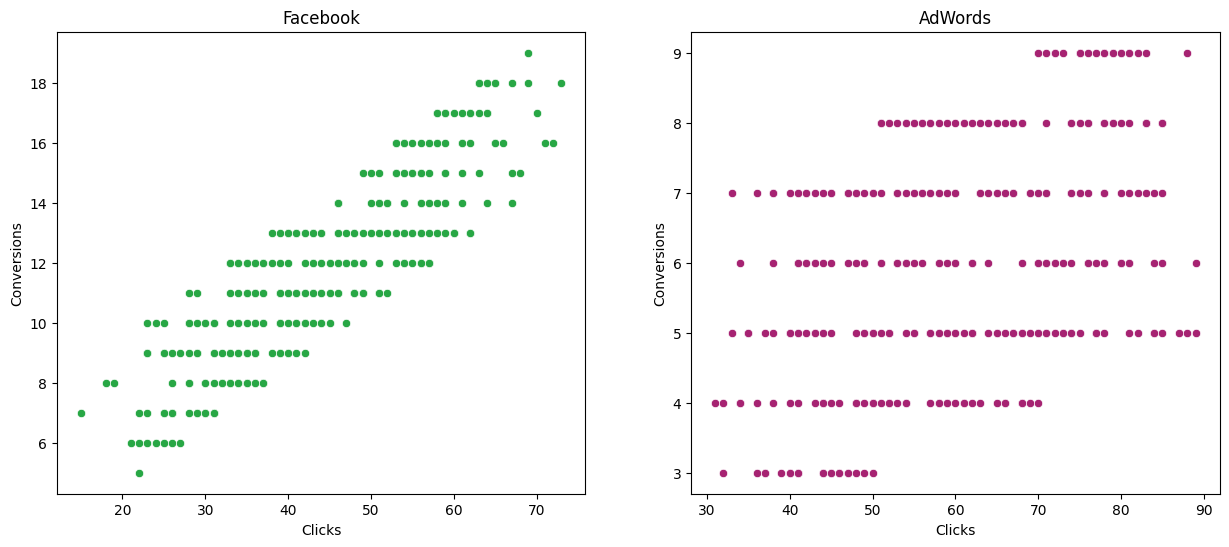

In [22]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.title('Facebook')
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#28a745')  # Green color
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(1, 2, 2)
plt.title('AdWords')
sns.scatterplot(x=df['AdWords Ad Clicks'], y=df['AdWords Ad Conversions'], color='#A62372')  # Purple color
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.show()


In [23]:
facebook_corr = df[['Facebook Ad Conversions', 'Facebook Ad Clicks']].corr()
facebook_corr


,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [24]:
adwords_corr = df[['AdWords Ad Conversions', 'AdWords Ad Clicks']].corr()
adwords_corr


,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [25]:
print("Correlation Coefficients\n-----------------------")
print("Facebook:", round(facebook_corr.values[0, 1], 2))
print("AdWords :", round(adwords_corr.values[0, 1], 2))


Correlation Coefficients
-----------------------
Facebook: 0.87
AdWords : 0.45


- A correlation coefficient of 0.87 shows a strong positive relationship between the number of clicks on Facebook ads and the resulting sales. As the number of clicks on Facebook ads increases, sales also tend to rise.

- This strong correlation suggests that Facebook ads are highly effective in boosting sales, as a significant portion of the variation in sales can be explained by the number of clicks on these ads.

- The relationship between clicks and sales implies that investing more in Facebook ads or optimizing their performance could lead to even higher sales.

- On the other hand, a correlation coefficient of 0.45 indicates a moderate positive relationship between clicks on AdWords ads and sales. While more clicks still tend to result in increased sales, the connection is not as strong as it is for Facebook ads.

- The moderate correlation in AdWords suggests that while these ads contribute to sales, other factors may also influence their effectiveness. Further analysis is needed to uncover these factors and improve AdWords campaigns.

# **Hypothesis Testing**

**Hypothesis:**
Advertising on Facebook is expected to lead to a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis (H₀):**
There is no difference in the number of conversions between Facebook and AdWords campaigns, or the number of conversions from AdWords is greater than or equal to those from Facebook.

𝐻0 : 𝜇_Facebook ≤ 𝜇_AdWords


**Alternate Hypothesis (H₁):**
The number of conversions from Facebook is greater than the number of conversions from AdWords.

𝐻1 : 𝜇_Facebook > 𝜇_AdWords


In [26]:
df['Facebook Ad Conversions'].mean()

np.float64(11.742465753424657)

In [27]:
from scipy import stats as st

print('Mean Conversion \n--------------')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(), 2))
print('Adwords  :', round(df['AdWords Ad Conversions'].mean(), 2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], 
                                b = df['AdWords Ad Conversions'], 
                                equal_var = False)
print('\nT statistic', t_stats, "\np-value", p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")


Mean Conversion 
--------------
Facebook : 11.74
Adwords  : 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


- The average number of conversions from Facebook ads (11.74) is significantly higher than the average conversions from AdWords ads (5.98). This indicates that Facebook advertising is, on average, more successful in generating conversions compared to AdWords.

- The T-statistic value (32.88) reflects how much the difference between the two groups’ means stands out relative to the variation within the groups. A higher T-statistic points to a larger difference between the groups.

- The p-value (9.35e-134) is extremely low, which provides strong evidence against the null hypothesis.

- The results support the alternate hypothesis, showing that Facebook ads generate more conversions than AdWords ads.

- Based on the sample data analysed, Facebook appears to be a more effective advertising channel for conversions compared to AdWords.

- Given this significant difference, it may be beneficial to focus more resources on Facebook ads. This could include increasing ad spending, refining targeting strategies, or testing different ad formats to enhance conversion rates.

# **Regression Analysis**

## **What can we expect if we choose to run Facebook ads? Given a certain number of Facebook ad clicks, how many conversions can we predict?**

In [28]:
# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X, y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction) * 100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):', round(r2, 2), '%')
print('Mean Squared Error:', round(mse, 2))


Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


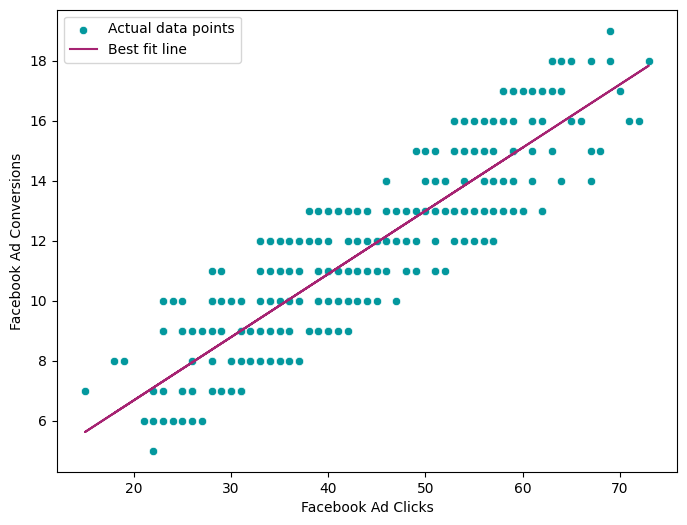

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'], y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()


In [30]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0], 2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0], 2)}')


For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


- The model shows a good ability to predict conversions, with an R² score of 76.35%. This means that it can reliably estimate the number of conversions based on the amount of Facebook ad clicks.

- With these insights from the Linear Regression model, businesses can make smarter decisions regarding budget planning, resource allocation, and improving ad campaigns.

- For example, knowing how many conversions to expect from a specific number of clicks helps in setting realistic campaign goals, adjusting ad spend, and evaluating the return on investment (ROI) from Facebook ads.

Analyzing Facebook Campaign Metrics Over Time

In [31]:
# cleaning data (removing unwanted symbols and converting them to numerical values)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))


In [32]:
# filtering for facebook campaign
df = df[['Date', 'Facebook Ad Views', 'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad', 
         'Facebook Click-Through Rate (Clicks / View)', 'Facebook Conversion Rate (Conversions / Clicks)',
         'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


At what times of the month or days of the week do we observe the conversions?

In [33]:
# extracting month and weekday from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday


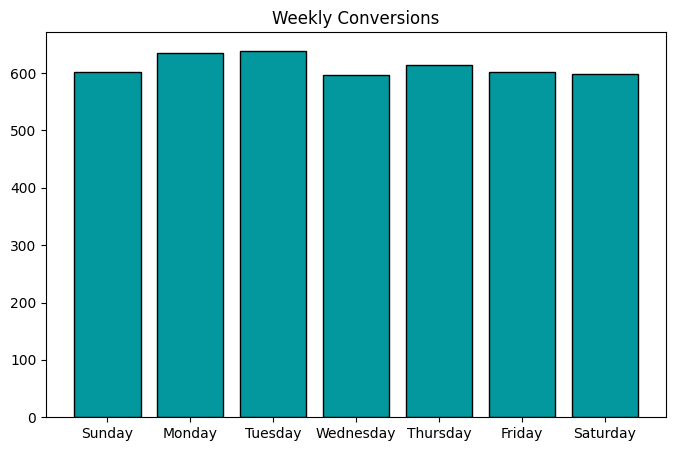

In [34]:
# plotting weekly conversions
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = "#03989E", edgecolor = 'k')
plt.show()


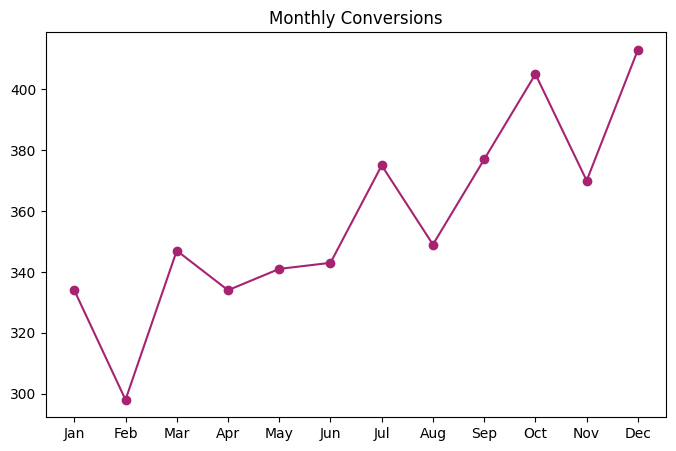

In [35]:
# plotting monthly conversions
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'], '-o', color = "#A62372")
plt.show()


Over the course of a year, the total number of conversions across weekdays remains fairly stable, suggesting consistent user engagement throughout the week. However, Mondays and Tuesdays stand out with the highest conversion rates, indicating that users are more responsive to marketing campaigns on these days.

The monthly trend shows an overall upward movement in conversions, reflecting growth over time. Nonetheless, certain months: specifically February, April, May, June, August, and November, show noticeable dips in conversions compared to other months. These decreases may be due to seasonal changes, shifting consumer behaviour, or adjustments in marketing strategies.

## **How does the Cost Per Conversion (CPC) trend over time?**

**Cost Per Conversion (CPC)**: This metric is used to evaluate the cost-effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimise their spending and targeting strategies effectively.

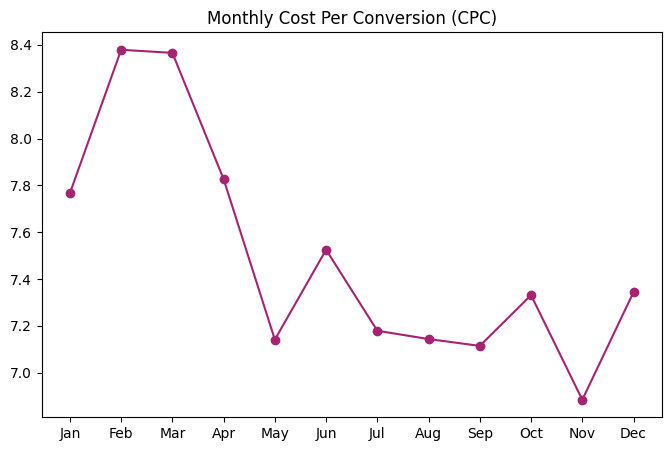

In [36]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad'] / monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'], '-o', color = '#A62372')
plt.show()


- The CPC (Cost Per Conversion) trend over the 12-month period shows some fluctuations but generally stays within a stable range.

- May and November record the lowest CPC values, which suggests that advertising during these months may be more cost-effective or that conversions are higher in these periods.

- February stands out with the highest CPC value, implying that advertising costs are comparatively higher during this month.

- Lower CPC values in months like May and November may point to better advertising efficiency or more favourable market conditions during those times.

- Allocating more of the advertising budget to months with historically lower CPC values (such as May and November) could help maximise the overall return on investment (ROI).

## **Is the relationship between advertising spend and conversion rates characterised by long-term equilibrium, suggesting that changes in budget consistently influence conversions in a proportional manner?**

In [37]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)

if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")


Cointegration test score: -14.755428385103219
P-value: 2.1337375979061323e-26

p-value is less than significance value, Reject the null hypothesis


- Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This suggests that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.

- By understanding this stable relationship between cost and conversions, businesses can better optimize their advertising strategies. Investing in campaigns that yield a strong return on investment (ROI) and adjusting spending based on performance can help maximize conversions while minimizing unnecessary costs.

## **Adding a New Business Metric: Return on Ad Spend (ROAS)**

To provide more actionable insights, we will calculate the Return on Ad Spend (ROAS). This metric measures the total revenue generated for every dollar spent on advertising. Since our dataset lacks a revenue column, we will make a clear assumption: an average revenue of $100 per conversion for a more realistic ROAS calculation.

**ROAS = (Total Revenue / Ad Cost) * 100**




Hypothesis Test for ROAS:
T-statistic: 26.037181762365517
P-value: 3.67833093699088e-89

Result: The difference in ROAS is statistically significant.


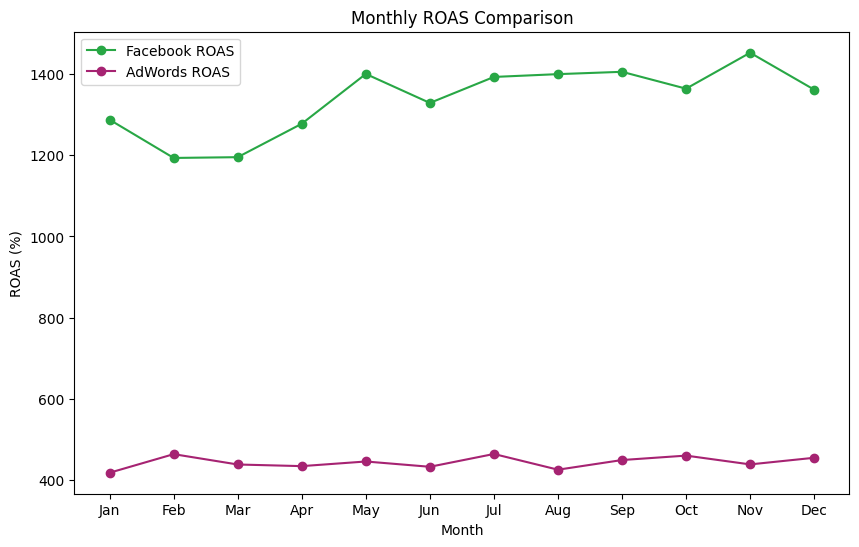


Average ROAS for the year:
--------------------------
Facebook: 1528.27 %
AdWords: 475.67 %


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset again to ensure we have both Facebook and AdWords data
df = pd.read_csv('marketing_campaign.csv')

# --- DATA CLEANING AND PREPARATION ---
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Clean and convert the 'Cost per Ad' and 'Rate' columns from object to float
def clean_and_convert(column):
    # This checks if a column is of type string before applying string operations
    if df[column].dtype == 'object':
        return df[column].str.replace('$', '').str.replace('%', '').str.strip().astype(float)
    return df[column]

cost_columns = ['Cost per Facebook Ad', 'Cost per AdWords Ad']
rate_columns = [
    'Facebook Click-Through Rate (Clicks / View)',
    'Facebook Conversion Rate (Conversions / Clicks)',
    'AdWords Click-Through Rate (Clicks / View)',
    'AdWords Conversion Rate (Conversions / Click)'
]
for col in cost_columns + rate_columns:
    df[col] = clean_and_convert(col)

# --- RENAMING COLUMNS FOR EASE OF USE ---
df.rename(columns={
    'Facebook Ad Clicks': 'Facebook_Clicks',
    'AdWords Ad Clicks': 'AdWords_Clicks',
    'Facebook Ad Conversions': 'Facebook_Conversions',
    'AdWords Ad Conversions': 'AdWords_Conversions',
    'Cost per Facebook Ad': 'Cost_Facebook',
    'Cost per AdWords Ad': 'Cost_AdWords'
}, inplace=True)

# --- ROAS CALCULATION ---
# Assume a revenue of $100 per conversion
df['Facebook_Revenue'] = df['Facebook_Conversions'] * 100
df['AdWords_Revenue'] = df['AdWords_Conversions'] * 100

# Calculate ROAS for each campaign
df['Facebook_ROAS'] = (df['Facebook_Revenue'] / df['Cost_Facebook']) * 100
df['AdWords_ROAS'] = (df['AdWords_Revenue'] / df['Cost_AdWords']) * 100

# --- TIME SERIES DATA FOR PLOTTING ---
df['month'] = df['Date'].dt.month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_df = df.groupby('month').agg({
    'Facebook_Revenue': 'sum',
    'Cost_Facebook': 'sum',
    'AdWords_Revenue': 'sum',
    'Cost_AdWords': 'sum'
}).reset_index()

# Calculate ROAS for the monthly data
monthly_df['Facebook_ROAS'] = (monthly_df['Facebook_Revenue'] / monthly_df['Cost_Facebook']) * 100
monthly_df['AdWords_ROAS'] = (monthly_df['AdWords_Revenue'] / monthly_df['Cost_AdWords']) * 100

# --- HYPOTHESIS TEST ON ROAS ---
from scipy import stats as st
t_stat, p_value = st.ttest_ind(
    a=df['Facebook_ROAS'],
    b=df['AdWords_ROAS'],
    equal_var=False
)
print('Hypothesis Test for ROAS:')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
if p_value < 0.05:
    print("\nResult: The difference in ROAS is statistically significant.")
else:
    print("\nResult: The difference in ROAS is not statistically significant.")

# --- PLOTTING ROAS ---
plt.figure(figsize=(10, 6))
plt.title('Monthly ROAS Comparison')
plt.plot(month_names, monthly_df['Facebook_ROAS'], '-o', color='#28a745', label='Facebook ROAS')
plt.plot(month_names, monthly_df['AdWords_ROAS'], '-o', color='#A62372', label='AdWords ROAS')
plt.xlabel('Month')
plt.ylabel('ROAS (%)')
plt.legend()
plt.show()

# --- FINAL ROAS AVERAGES ---
print('\nAverage ROAS for the year:')
print('--------------------------')
print('Facebook:', round(df['Facebook_ROAS'].mean(), 2), '%')
print('AdWords:', round(df['AdWords_ROAS'].mean(), 2), '%')

## **Conclusion and Strategic Recommendations**

This comparative analysis of the Facebook and AdWords campaigns has provided several key insights to inform our future advertising strategy:

* **Superior Performance on Facebook**: Our analysis consistently shows that the Facebook ad campaign outperforms the AdWords campaign on several key metrics. The average number of conversions on Facebook (11.74) is significantly higher than on AdWords (5.98).

* **Higher Cost-Effectiveness**: The Facebook campaign is not only more effective at driving conversions, but it is also more cost-efficient, delivering a higher average Return on Ad Spend (ROAS). This indicates that our budget is working harder on the Facebook platform, yielding a better return for every dollar spent.

* **Stable Long-Term Relationship**: Our cointegration test revealed a long-term equilibrium between advertising spend and conversions on Facebook, suggesting that sustained investment in this platform is likely to yield stable, predictable results over time.

### **Actionable Recommendations**

Based on these findings, we recommend the following:

1.  **Reallocate Ad Spend**: Shift a larger portion of the advertising budget towards the Facebook campaign. Given its higher conversion rates and superior ROAS, this reallocation will likely lead to a higher overall return on investment for our client.
2.  **Investigate AdWords Performance**: While AdWords has a moderate correlation between clicks and conversions, its overall performance is weaker. A deeper analysis is required to understand why. Future projects could include a keyword performance audit or an A/B test of different ad creatives on the AdWords platform to optimize its effectiveness.
3.  **Monitor Key Metrics**: Continue to track ROAS, conversion rates, and CPC on a monthly basis. This will allow for proactive adjustments to the strategy to ensure we maintain cost-effectiveness and capitalize on seasonal trends, such as the high-performing months of May and November.